In [1]:
# KNN
# Decision trees
# random forrest
# SVM
# Linear regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

survivors = pd.read_csv('train.csv')

In [4]:
survivors.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
bins= (0,5,10,15,20,25,30,35,40,45,50,55,60,65, 70, 75,80,85)
survivors["Sex"]=survivors["Sex"].astype("category").cat.codes
survivors["Embarked"]=survivors["Embarked"].astype("category").cat.codes
survivors["Embarked"]=survivors["Embarked"].astype("category").cat.codes
survivors["Age"]=survivors["Age"].fillna(29.699118)

In [7]:
survivors.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [8]:
survivors["Age"].isna().sum()

0

In [9]:
survivors.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


In [10]:
nasurvivors=survivors.dropna()

In [11]:
nasurvivors2=nasurvivors

In [12]:
nasurvivors['Age'] = pd.cut(nasurvivors['Age'], bins=bins, labels=False)
bins2= [0,50,100,150,200,250,300,350,400,450,500,550,600, 650,700,750,800,850,900]
# nasurvivors['Fare'] = pd.cut(nasurvivors['Fare'], bins=bins2, labels=False)

In [13]:
# nasurvivors['Fare'].sort_values(ascending=False)

In [14]:
# Assign the data to X and y
# All useful data
# X = survivors[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]

#All numerical data
X = nasurvivors[["Pclass", "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = nasurvivors["Survived"].values.reshape(-1, 1)
print(X.shape, y.shape)

(891, 7) (891, 1)


In [15]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [16]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [17]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3834511316633886
Testing Score: 0.43246824033708126


Text(0.5,1,'Residual Plot')

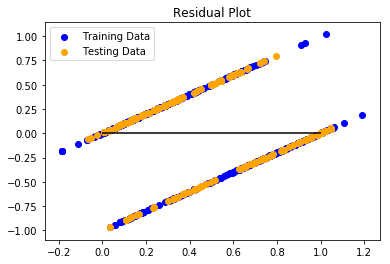

In [18]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION